### Import Module

In [2]:
# Import Module
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import plotly

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_rows', 50)

import hide_code

### Read Dataset

In [3]:
# Membaca file CSV dan mengubah kolom 'InvoiceDate' menjadi tipe tanggal
df = pd.read_csv('Sample - Superstore.csv', parse_dates=['Order Date'],encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# Introduction

## Latar belakang 

Superstore adalah sebuah toko yang menjual peralatan kantor, teknologi, dan perlengkapan kantor kepada semua kalangan, baik konsumen retail maupun bisnis. Superstore memiliki banyak cabang yang tersebar di 48 negara bagian di Amerika Serikat dan hanya beroperasi di Amerika. Dengan berbagai macam produk yang tersedia, Superstore menjadi pilihan utama bagi pelanggan yang mencari kualitas dan harga terbaik.


## Pernyataan Masalah

Perusahaan ingin memahami retensi pelanggan berdasarkan kategori produk untuk mengevaluasi performa kategori dan menentukan strategi yang dapat meningkatkan loyalitas pelanggan. Fokus analisis adalah mengidentifikasi pola retensi pelanggan pada setiap kategori secara individual dan mengevaluasi bagaimana perilaku pelanggan berkembang seiring waktu dalam kategori tersebut.

Masalah yang ingin dijawab:
1. Bagaimana tingkat retensi pelanggan di setiap kategori dari waktu ke waktu?
2. Apakah ada kategori tertentu yang memiliki tingkat retensi lebih tinggi dibandingkan kategori lain?
3. Apakah ada kategori yang memerlukan perbaikan dalam strategi pemasaran atau pengelolaan produk untuk mencegah penurunan retensi ?




## Tujuan Analisis


1. Menganalisis tingkat retensi pelanggan di setiap kategori untuk mengetahui pola loyalitas pelanggan dan memberikan rekomendasi strategis untuk masing-masing kategori.

2. Mengukur tingkat retensi pelanggan per kategori dalam rentang waktu tertentu (bulanan atau kuartalan).
3. Mengidentifikasi kategori dengan tingkat retensi tertinggi untuk memprioritaskan investasi pemasaran dan operasional.
4. Mengevaluasi penyebab penurunan retensi di kategori tertentu, sehingga strategi perbaikan dapat dirancang.

## Penjelasan Dataset

Dataset berisi informasi mengenai penjualan, keuntungan, dan berbagai aspek operasional dari Superstore. Dataset ini mencakup detail seperti tanggal pesanan, tanggal pengiriman, mode pengiriman, ID pelanggan, nama pelanggan, segmen pelanggan, negara, kota, negara bagian, kode pos, wilayah, ID produk, kategori, sub-kategori, nama produk, penjualan, kuantitas, diskon, dan keuntungan.

### Penjelasan Per Kolom Dataset:
- **Row ID**: Unique ID for each row
- **Order ID**: Unique Order ID for each Customer.
- **Order Date**: Order Date of the product.
- **Ship Date**: Shipping Date of the Product.
- **Ship Mode**: Shipping Mode specified by the Customer.
- **Customer ID**: Unique ID to identify each Customer.
- **Customer Name**: Name of the Customer.
- **Segment**: The segment where the Customer belongs.
- **Country**: Country of residence of the Customer.
- **City**: City of residence of of the Customer.
- **State**: State of residence of the Customer.
- **Postal Code**:Postal Code of every Customer.
- **Region**: Region where the Customer belong.
- **Product ID**: Unique ID of the Product.
- **Category**: Category of the product ordered.
- **Sub-Category**: Sub-Category of the product ordered.
- **Product Name**: Name of the Product.
- **Sales**: Sales of the Product.
- **Quantity**: Quantity of the Product.
- **Discount**: Discount provided.
- **Profit**: Profit/Loss incurred.

# Data Cleaning

In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Dari hasil script diatas dapat dilihat bahwa dataset tidak memiliki **Data Null**. 

In [5]:
df.duplicated().sum()

0

Dari hasil script diatas dapat dilihat bahwa dataset tidak memiliki **Duplikat Data**

# Exploratory Data Analysis

In [6]:
rows, columns = df.shape

print(f"Panjang baris: {rows}")
print(f"Panjang kolom: {columns}")


Panjang baris: 9994
Panjang kolom: 21


Dalam dataset terdapat 9994 baris data dan sebanyak 21 kolom

In [7]:
df['Country'].unique()

array(['United States'], dtype=object)

Superstore hanya memiliki cabang di negara Amerika Serikat Saja

In [8]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

Superstore memiliki cabang di 48 negara bagian amerika dan di dalam District of Columbia.

In [9]:
test = df["Customer ID"].nunique()
print(f"Di dalam Dataset terdapat sebanyak {test} Customer yang berbeda")

Di dalam Dataset terdapat sebanyak 793 Customer yang berbeda


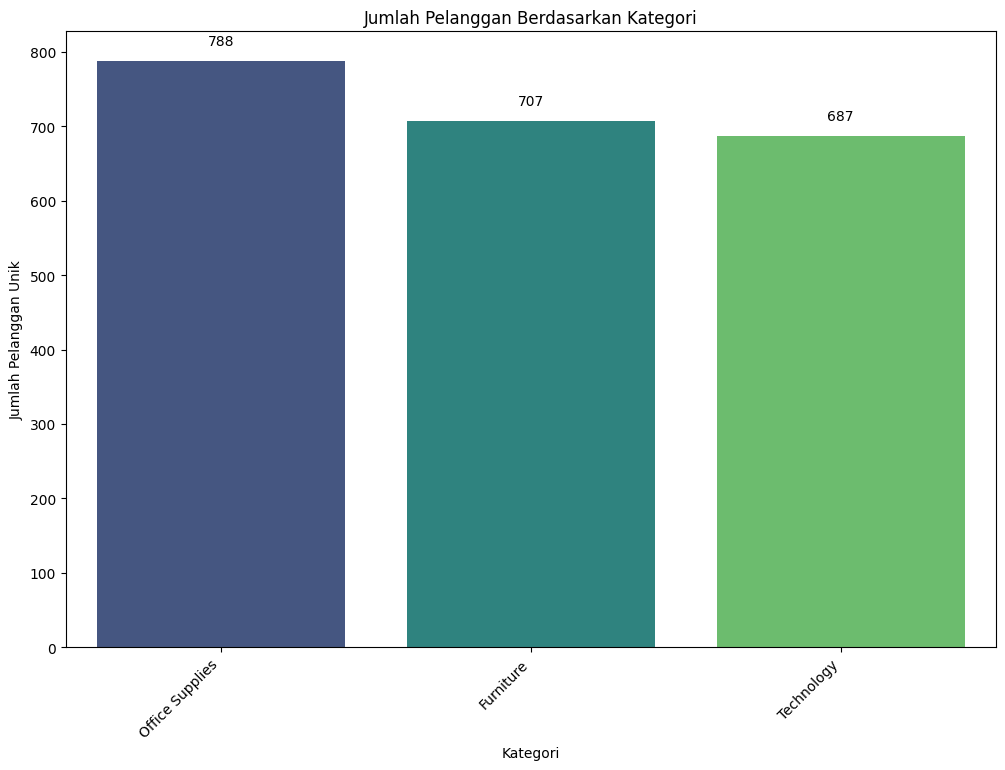

In [10]:
# Menghitung jumlah pelanggan unik untuk setiap kategori
unique_customer_count_by_category = df.groupby('Category')['Customer ID'].nunique().reset_index(name='Unique Customer Count')

# Mengurutkan hasil berdasarkan jumlah pelanggan terbesar
unique_customer_count_by_category = unique_customer_count_by_category.sort_values(by='Unique Customer Count', ascending=False)

# Membuat bar plot untuk jumlah pelanggan unik berdasarkan kategori
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=unique_customer_count_by_category, x='Category', y='Unique Customer Count', palette='viridis')
plt.title('Jumlah Pelanggan Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pelanggan Unik')

# Memutar label sumbu x untuk menghindari tumpang tindih
plt.xticks(rotation=45, ha='right')

# Menambahkan anotasi jumlah pelanggan unik pada setiap bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'bottom', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

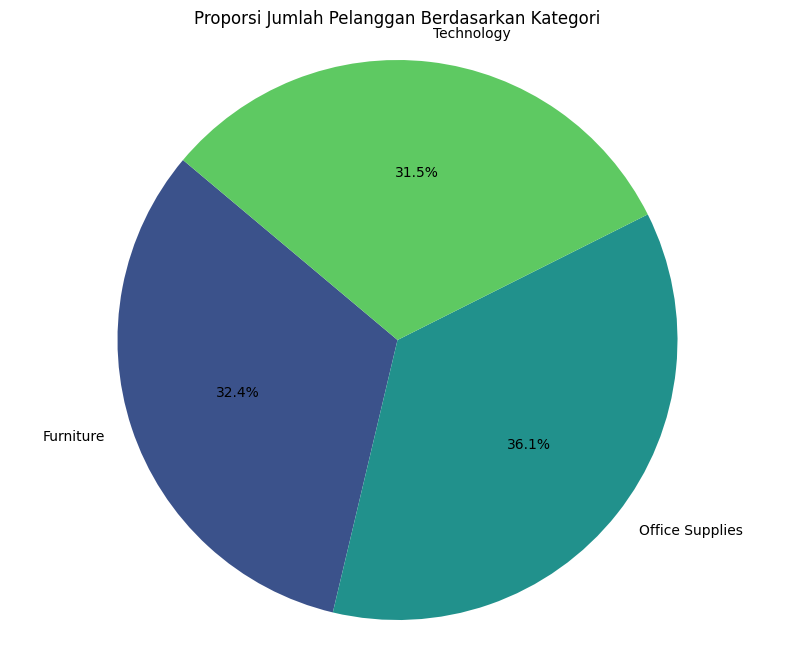

In [11]:
# Menghitung jumlah pelanggan unik untuk setiap kategori
unique_customer_count_by_category = df.groupby('Category')['Customer ID'].nunique().reset_index(name='Unique Customer Count')

# Membuat pie chart untuk proporsi jumlah pelanggan unik berdasarkan kategori
plt.figure(figsize=(10, 8))
plt.pie(unique_customer_count_by_category['Unique Customer Count'], labels=unique_customer_count_by_category['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(unique_customer_count_by_category)))
plt.title('Proporsi Jumlah Pelanggan Berdasarkan Kategori')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

Dari visualisasi ini, kita bisa melihat bahwa kategori "Office Supplies" memiliki jumlah pelanggan paling banyak dibandingkan dengan kategori lainnya. Namun, jumlah pelanggan pada kategori lain seperti "Furniture" dan "Technology" tidak jauh berbeda satu sama lain.

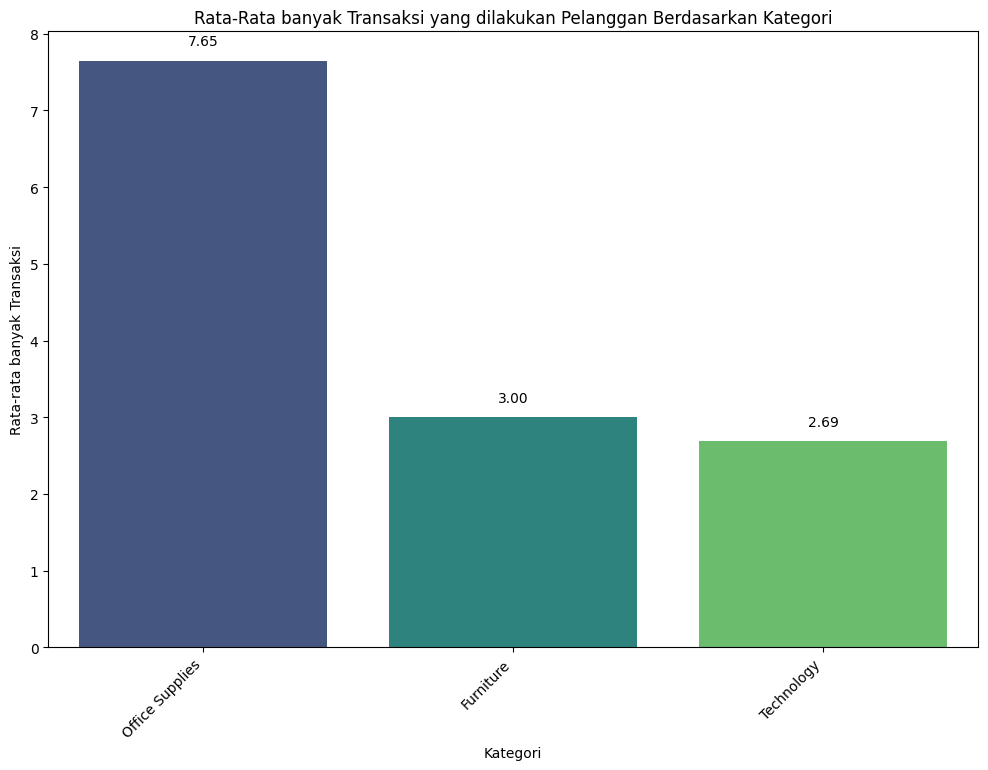

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene

# Menghitung jumlah transaksi per pelanggan untuk setiap kategori
transactions_per_customer = df.groupby(['Category', 'Customer ID']).size().reset_index(name='Transaction Count')
average_transactions_per_category = transactions_per_customer.groupby('Category')['Transaction Count'].mean().reset_index(name='Average Transaction Count')

# Mengurutkan hasil berdasarkan rata-rata jumlah transaksi terbesar
average_transactions_per_category = average_transactions_per_category.sort_values(by='Average Transaction Count', ascending=False)

# Membuat bar plot untuk rata-rata jumlah transaksi per pelanggan berdasarkan kategori
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=average_transactions_per_category, x='Category', y='Average Transaction Count', palette='viridis')
plt.title('Rata-Rata banyak Transaksi yang dilakukan Pelanggan Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata banyak Transaksi')

# Memutar label sumbu x untuk menghindari tumpang tindih
plt.xticks(rotation=45, ha='right')

# Menambahkan anotasi rata-rata jumlah transaksi pada setiap bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'bottom', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

## T-Test Double Population Mean Furniture VS Technology

`Asumsi` : Apakah rata-rata banyak Transaksi yang dilakukan user pada kategori Furniture tidak sama dengan Technology ?
    
`Hipotesis` :
    
$H_{0} : \mu_{Furniture} = \mu_{Technology}$ 

$H_{a} :  \mu_{Furniture} \neq  \mu_{Technology}$ 

`Signifikansi` 
$\alpha=0.1$

`Pengambilan Kesimpulan` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [56]:
# Mengambil data jumlah transaksi untuk kategori Furniture dan Technology
furniture_transactions = transactions_per_customer[transactions_per_customer['Category'] == 'Furniture']['Transaction Count']
technology_transactions = transactions_per_customer[transactions_per_customer['Category'] == 'Technology']['Transaction Count']

# Melakukan uji Levene untuk memeriksa kesamaan varians
levene_stat, levene_p_value = levene(furniture_transactions, technology_transactions)

# Melakukan uji t dua sampel (t-test independen) dengan tingkat kepercayaan 90%
confidence_level = 0.90
alpha = 1 - confidence_level

# Menyesuaikan uji t dua sampel berdasarkan hasil uji Levene
if levene_p_value > alpha:
    t_stat, t_p_value = ttest_ind(furniture_transactions, technology_transactions, equal_var=True)
else:
    t_stat, t_p_value = ttest_ind(furniture_transactions, technology_transactions, equal_var=False)
    

# Interpretasi hasil
if alpha < t_p_value:
    print("Rata-rata jumlah transaksi untuk kategori Furniture dan Technology berbeda secara signifikan.")
else:
    print("Tidak ada bukti yang cukup untuk menyatakan bahwa rata-rata jumlah transaksi untuk kategori Furniture dan Technology berbeda.")


Tidak ada bukti yang cukup untuk menyatakan bahwa rata-rata jumlah transaksi untuk kategori Furniture dan Technology berbeda.


Dari visualisasi ini, kita bisa melihat bahwa kategori "Office Supplies" memiliki Rata-rata jumlah transaksi yang paling banyak dibandingkan dengan kategori lainnya. Namun, Rata-rata jumlah transaksi pada kategori "Furniture" dan "Technology" tidak jauh berbeda anatara satu sama lain. Hal ini masuk akal karena produk "Office Supplies" cenderung dibeli lebih sering dibandingkan dengan produk "Technology" yang memiliki siklus hidup lebih panjang. Produk "Office Supplies" cenderung berada dalam tahap kematangan dalam siklus hidup produk, di mana permintaan stabil dan konsumen sering melakukan pembelian ulang karena kebutuhan yang terus-menerus.

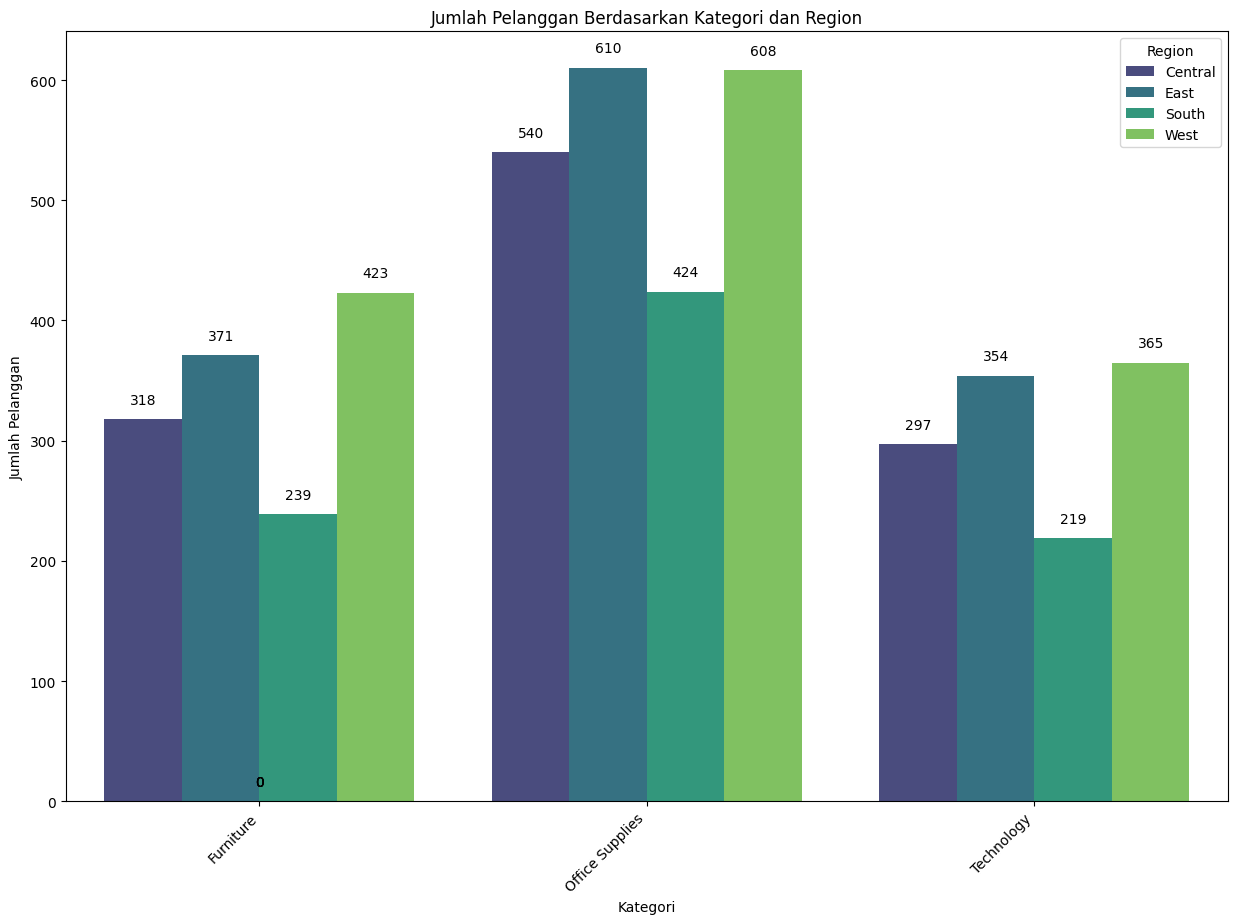

In [13]:
# Menghitung jumlah pelanggan unik untuk setiap kategori dan region
unique_customer_count_by_category_region = df.groupby(['Category', 'Region'])['Customer ID'].nunique().reset_index(name='Unique Customer Count')

# Membuat bar plot untuk jumlah pelanggan unik berdasarkan kategori dan region
plt.figure(figsize=(15, 10))
barplot = sns.barplot(data=unique_customer_count_by_category_region, x='Category', y='Unique Customer Count', hue='Region', palette='viridis')
plt.title('Jumlah Pelanggan Berdasarkan Kategori dan Region')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pelanggan')

# Menambahkan anotasi jumlah pelanggan unik pada setiap bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'bottom', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')
plt.show()

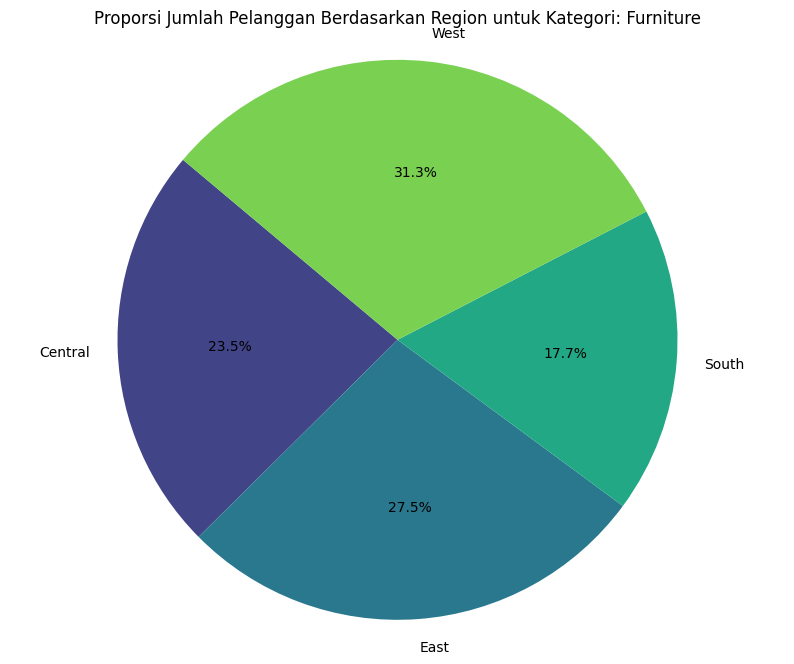

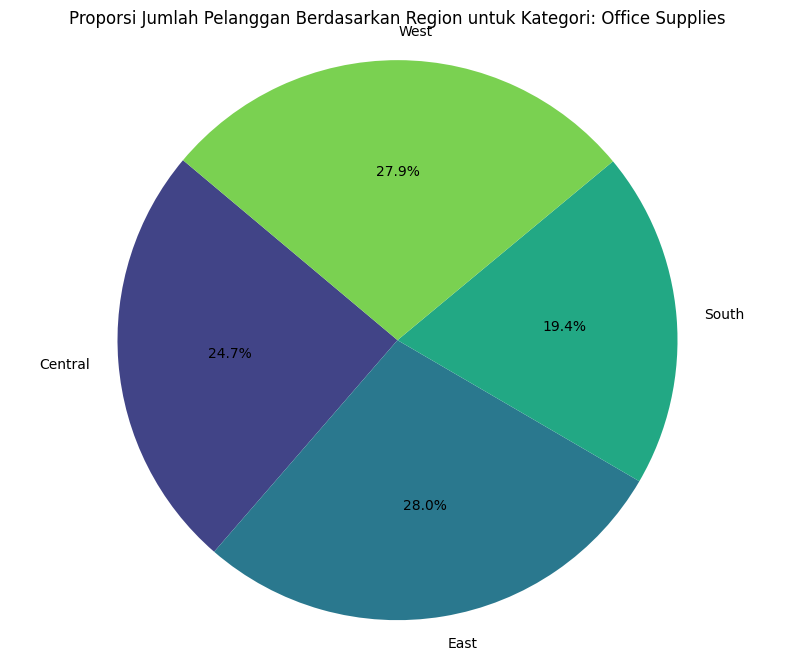

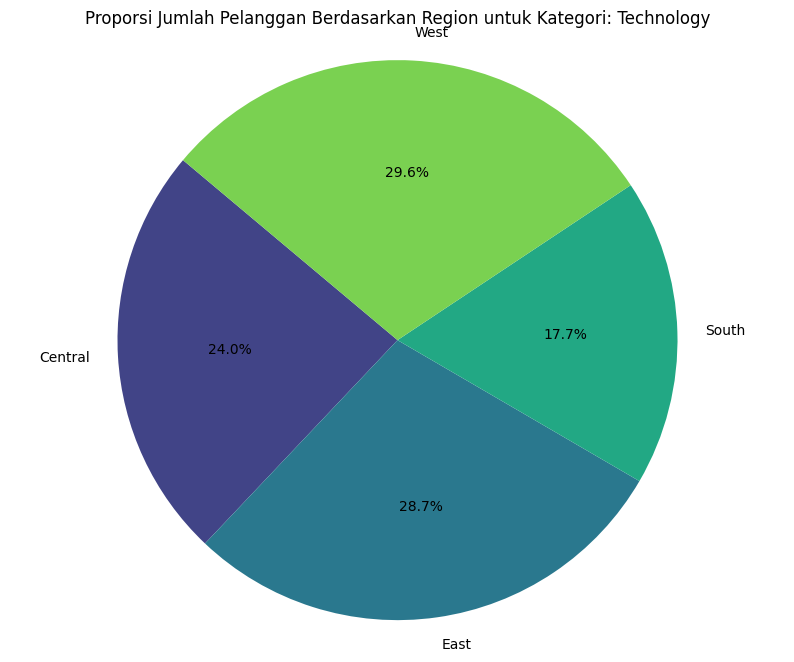

In [14]:
# Menghitung jumlah pelanggan unik untuk setiap kategori dan region
unique_customer_count_by_category_region = df.groupby(['Category', 'Region'])['Customer ID'].nunique().reset_index(name='Unique Customer Count')

# Membuat palet warna yang sama seperti di bar plot sebelumnya
regions = unique_customer_count_by_category_region['Region'].unique()
colors = sns.color_palette('viridis', len(regions))

# Membuat pie chart untuk proporsi jumlah pelanggan unik berdasarkan kategori dan region
categories = unique_customer_count_by_category_region['Category'].unique()

for category in categories:
    plt.figure(figsize=(10, 8))
    data = unique_customer_count_by_category_region[unique_customer_count_by_category_region['Category'] == category]
    plt.pie(data['Unique Customer Count'], labels=data['Region'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Proporsi Jumlah Pelanggan Berdasarkan Region untuk Kategori: {category}')
    plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
    plt.show()



Dari visualisasi ini, kita bisa melihat bahwa pola jumlah pelanggan untuk setiap Region (Central, East, South dan West) hampir sama di semua kategori. Secara umum, sekitar 29% dari pelanggan di setiap kategori berasal dari Region East, 24% dari Region Central, 30% dari region South dan 18% dari Region South. Pola ini konsisten di semua kategori yang ada.

Dari data ini, kita bisa melihat bahwa ada banyak pelanggan yang melakukan pembelian di lebih dari satu region. Hal ini terlihat dari jumlah pelanggan yang tinggi di setiap region untuk kategori yang sama, seperti "Office Supplies" yang memiliki jumlah pelanggan signifikan di Central, East, South, dan West. Ini menunjukkan bahwa pelanggan tidak terbatas pada satu region saja, melainkan melakukan pembelian di berbagai region

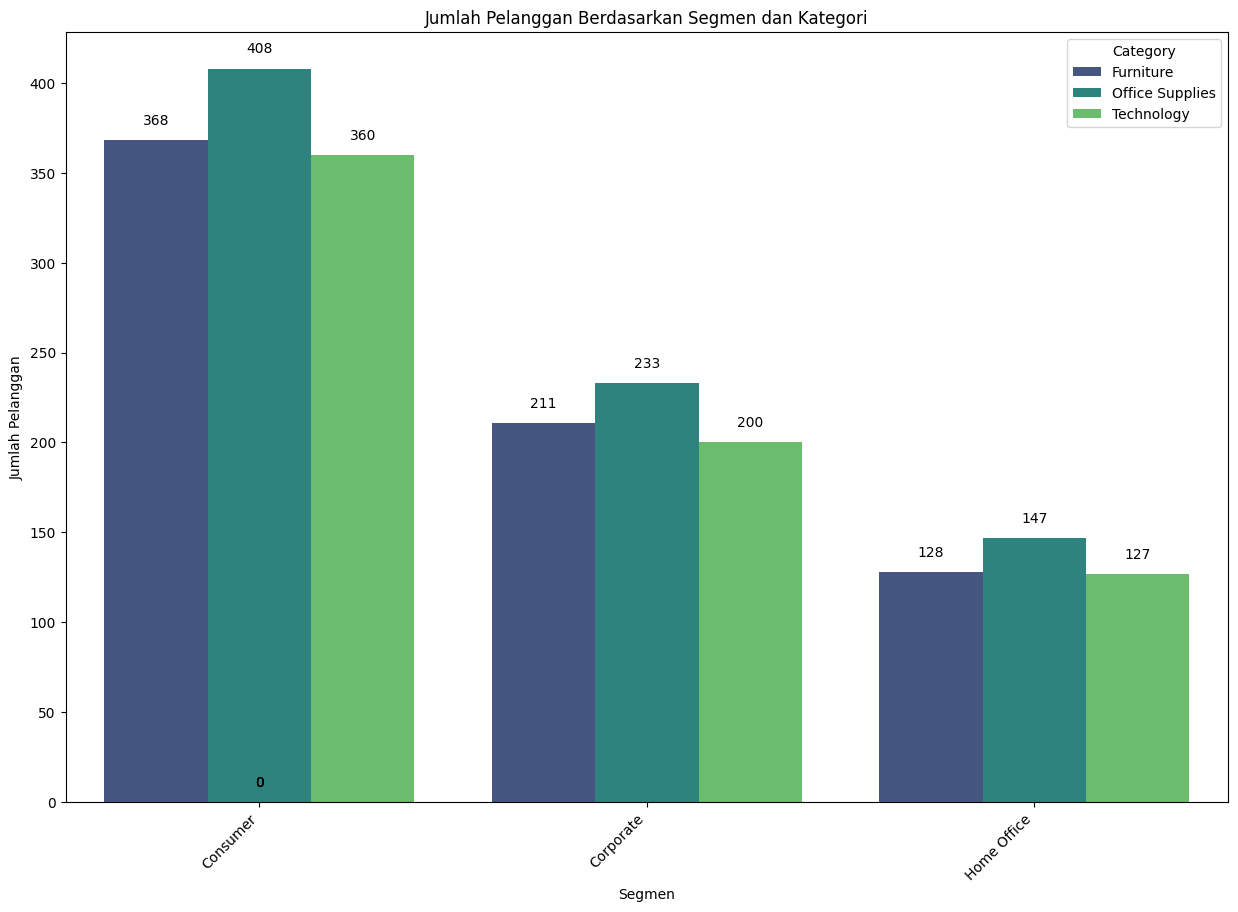

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df adalah DataFrame Anda
# Menghitung jumlah pelanggan unik untuk setiap segmen dan kategori
unique_customer_count_by_segment_category = df.groupby(['Segment', 'Category'])['Customer ID'].nunique().reset_index(name='Unique Customer Count')

# Membuat palet warna yang sama seperti di pie chart sebelumnya
categories = unique_customer_count_by_segment_category['Category'].unique()
colors = sns.color_palette('viridis', len(categories))

# Membuat bar plot untuk jumlah pelanggan unik berdasarkan segmen dan kategori
plt.figure(figsize=(15, 10))
barplot = sns.barplot(data=unique_customer_count_by_segment_category, x='Segment', y='Unique Customer Count', hue='Category', palette=colors)
plt.title('Jumlah Pelanggan Berdasarkan Segmen dan Kategori')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Pelanggan')

# Menambahkan anotasi jumlah pelanggan unik pada setiap bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'bottom', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.legend(title='Category')
plt.xticks(rotation=45, ha='right')
plt.show()

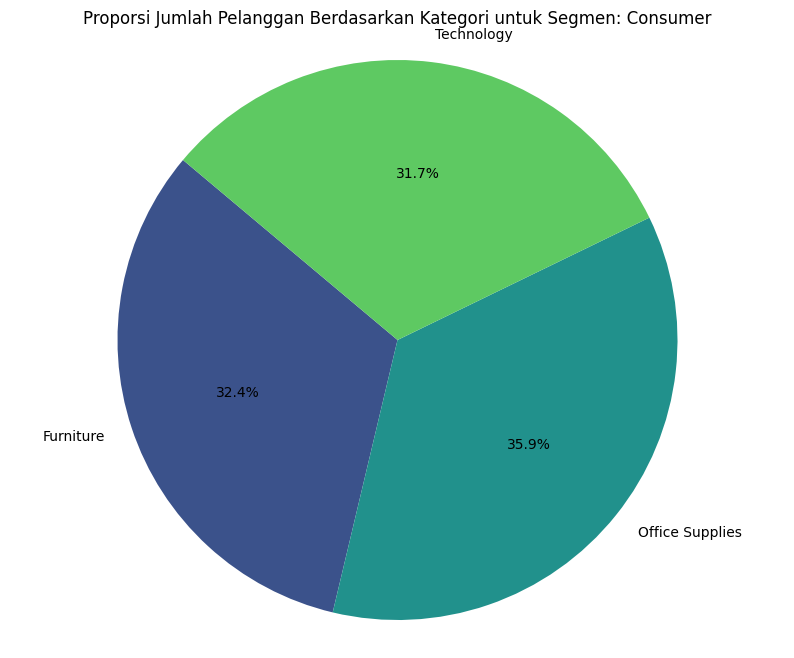

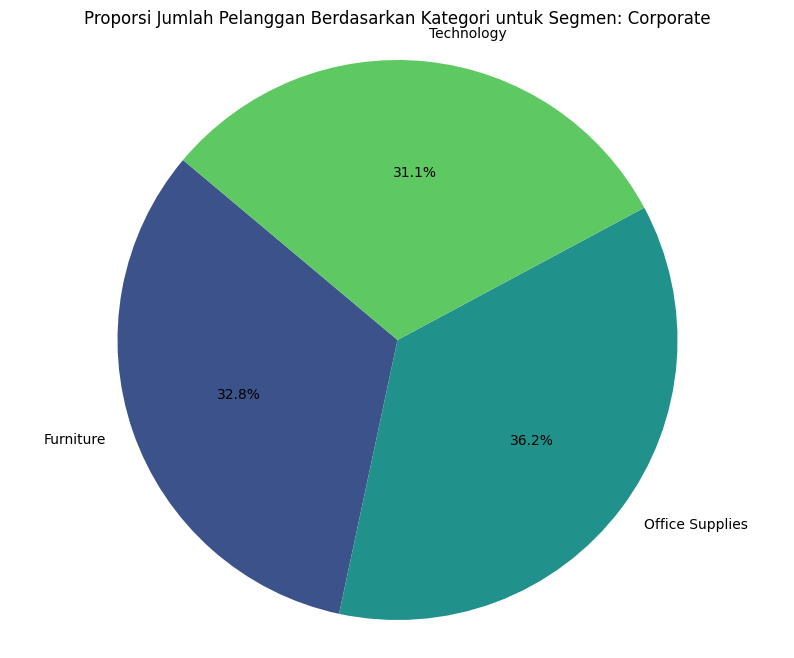

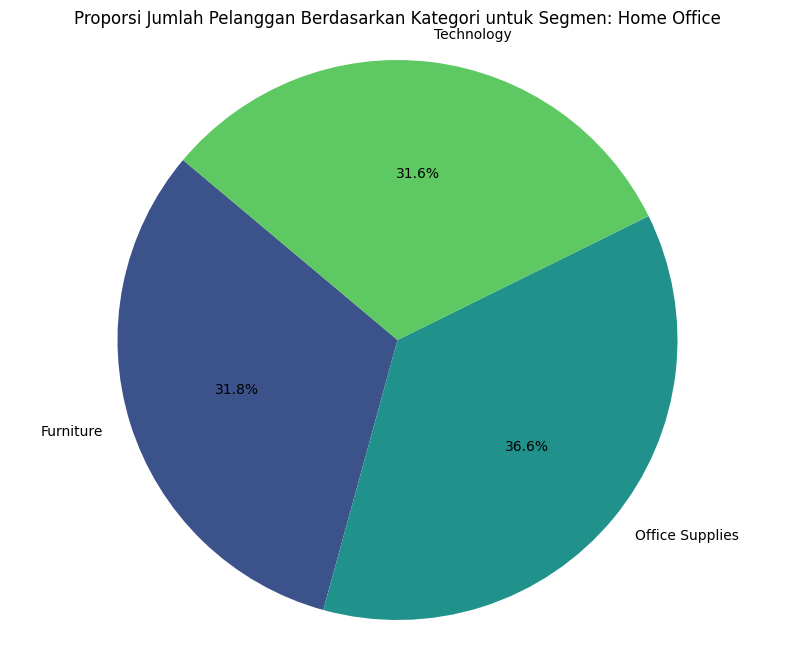

In [16]:
# Menghitung jumlah pelanggan unik untuk setiap segmen dan kategori
unique_customer_count_by_segment_category = df.groupby(['Segment', 'Category'])['Customer ID'].nunique().reset_index(name='Unique Customer Count')

# Membuat palet warna yang sama seperti di bar plot sebelumnya
categories = unique_customer_count_by_segment_category['Category'].unique()
colors = sns.color_palette('viridis', len(categories))

# Membuat pie chart untuk proporsi jumlah pelanggan unik berdasarkan segmen dan kategori
segments = unique_customer_count_by_segment_category['Segment'].unique()

for segment in segments:
    plt.figure(figsize=(10, 8))
    data = unique_customer_count_by_segment_category[unique_customer_count_by_segment_category['Segment'] == segment]
    plt.pie(data['Unique Customer Count'], labels=data['Category'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Proporsi Jumlah Pelanggan Berdasarkan Kategori untuk Segmen: {segment}')
    plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
    plt.show()

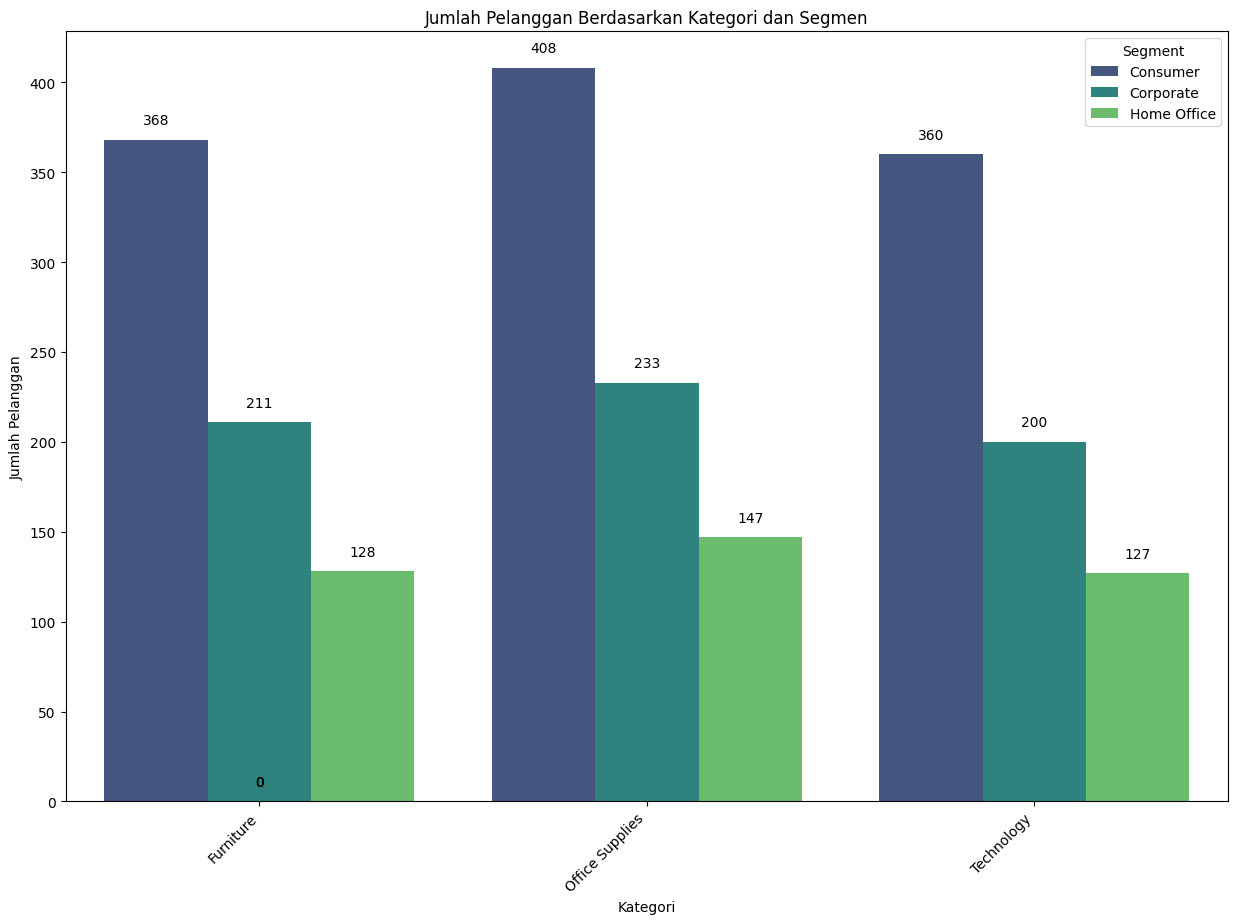

In [17]:
# Menghitung jumlah pelanggan unik untuk setiap kategori dan segmen
unique_customer_count_by_category_segment = df.groupby(['Category', 'Segment'])['Customer ID'].nunique().reset_index(name='Unique Customer Count')

# Membuat palet warna yang sama seperti di pie chart sebelumnya
segments = unique_customer_count_by_category_segment['Segment'].unique()
colors = sns.color_palette('viridis', len(segments))

# Membuat bar plot untuk jumlah pelanggan unik berdasarkan kategori dan segmen
plt.figure(figsize=(15, 10))
barplot = sns.barplot(data=unique_customer_count_by_category_segment, x='Category', y='Unique Customer Count', hue='Segment', palette=colors)
plt.title('Jumlah Pelanggan Berdasarkan Kategori dan Segmen')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pelanggan')

# Menambahkan anotasi jumlah pelanggan unik pada setiap bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'bottom', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.legend(title='Segment')
plt.xticks(rotation=45, ha='right')
plt.show()

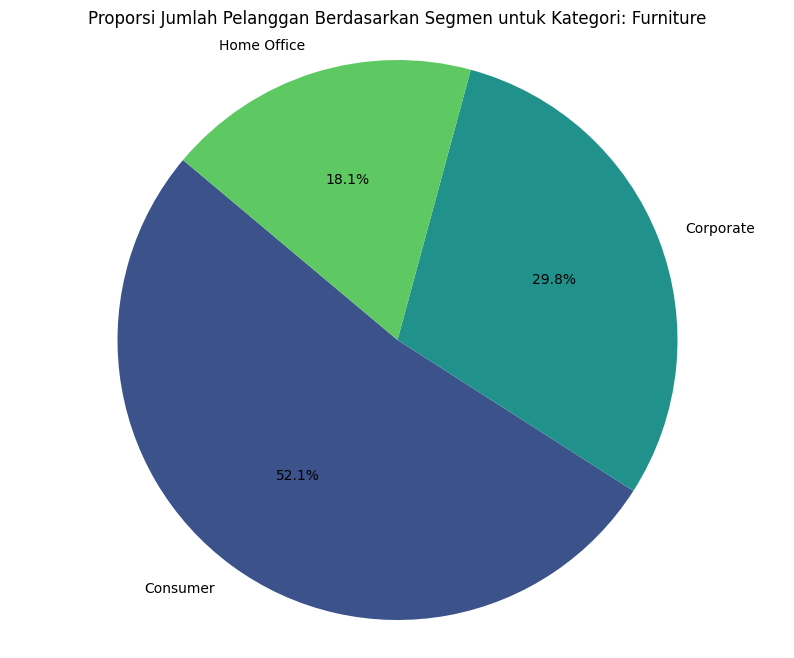

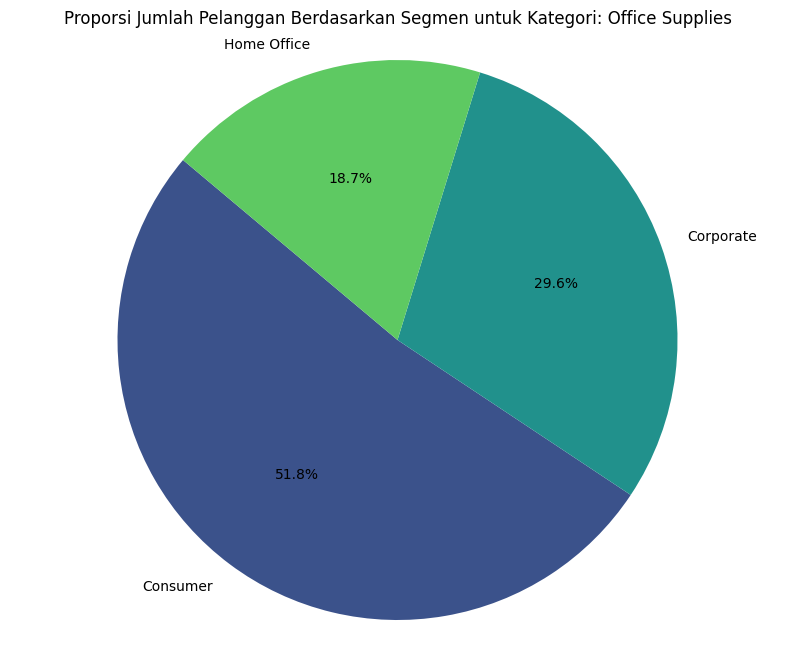

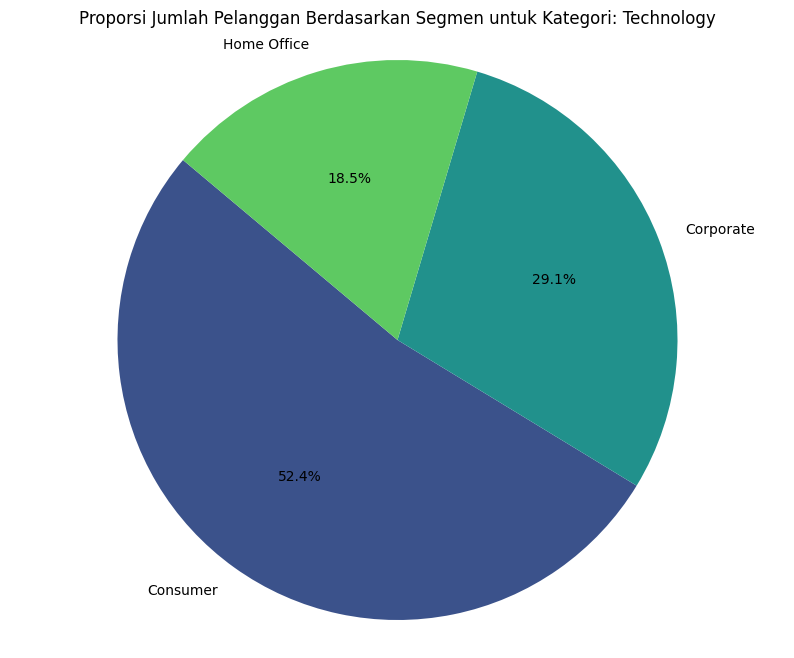

In [18]:
# Menghitung jumlah pelanggan unik untuk setiap kategori dan segmen
unique_customer_count_by_category_segment = df.groupby(['Category', 'Segment'])['Customer ID'].nunique().reset_index(name='Unique Customer Count')

# Membuat palet warna yang sama seperti di bar plot sebelumnya
segments = unique_customer_count_by_category_segment['Segment'].unique()
colors = sns.color_palette('viridis', len(segments))

# Membuat pie chart untuk proporsi jumlah pelanggan unik berdasarkan kategori dan segmen
categories = unique_customer_count_by_category_segment['Category'].unique()

for category in categories:
    plt.figure(figsize=(10, 8))
    data = unique_customer_count_by_category_segment[unique_customer_count_by_category_segment['Category'] == category]
    plt.pie(data['Unique Customer Count'], labels=data['Segment'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Proporsi Jumlah Pelanggan Berdasarkan Segmen untuk Kategori: {category}')
    plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
    plt.show()



Dari visualisasi ini, kita bisa melihat bahwa pola jumlah pelanggan untuk setiap segmen (Consumer, Home Office, dan Corporate) hampir sama di semua kategori. Secara umum, sekitar 52% dari pelanggan di setiap kategori berasal dari segmen Consumer, 29% dari segmen Corporate, dan 18% dari segmen Home Office. Pola ini konsisten di semua kategori yang ada.

# Cohort Analysis Secara General

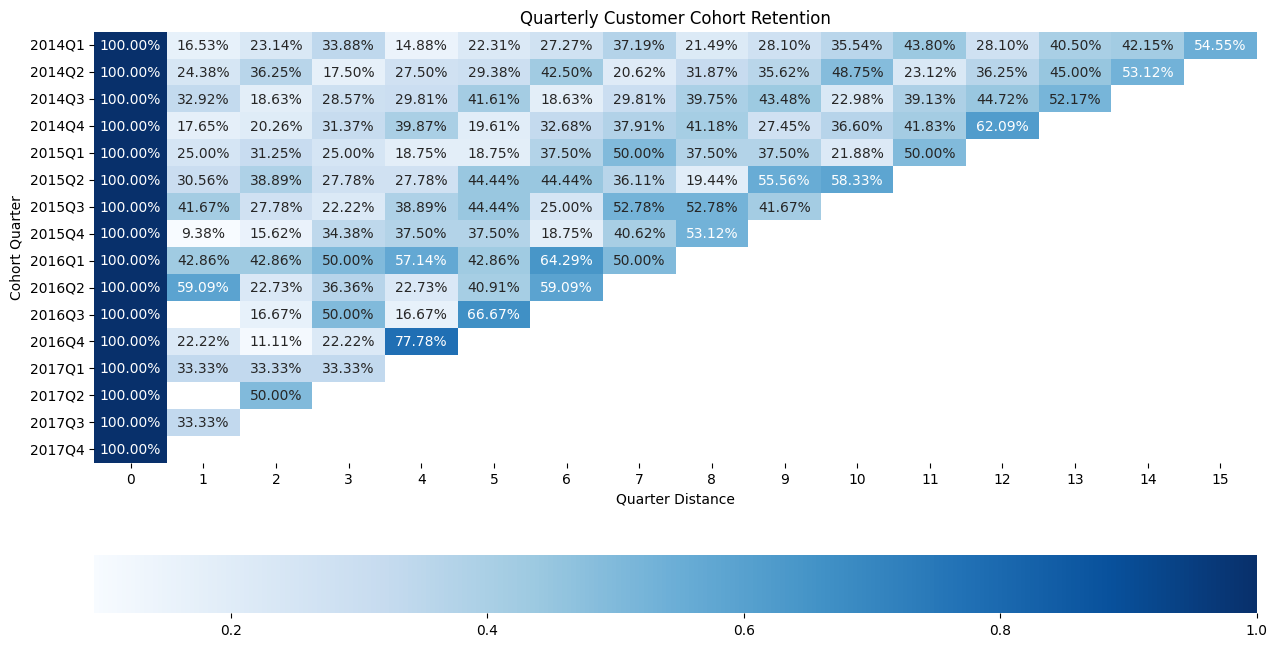

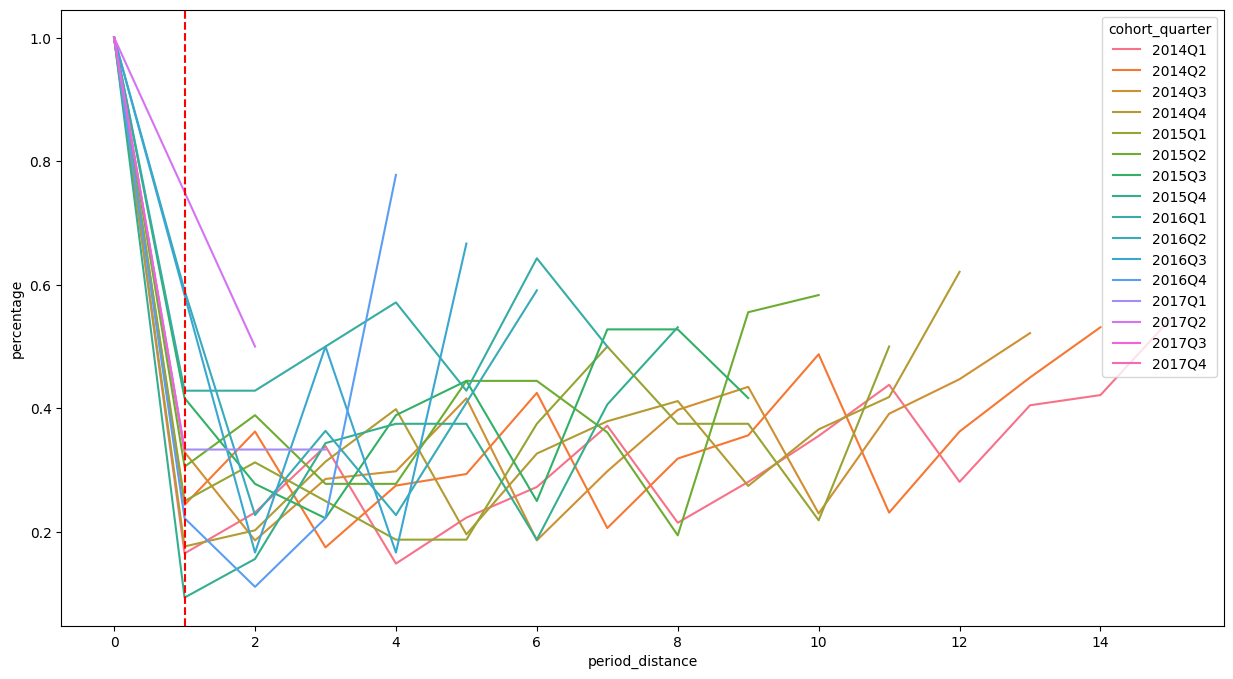

In [19]:
dfgen = df.copy()
# step 1 
# define cohort period
dfgen['cohort_quarter']=dfgen.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('Q')

#Step 2
#define current transaction period
dfgen['current_transaction_quarter']=dfgen['Order Date'].dt.to_period('Q')

dfgen=dfgen[['Customer ID','cohort_quarter','current_transaction_quarter']]

#hanya butuh tau dia transaksi atau tidak (bukan jumlah transaksinya)
dfgen.drop_duplicates(inplace=True)

#step 3
# agregasi
cohort_retention_binders=dfgen.groupby(['cohort_quarter', 'current_transaction_quarter'])['Customer ID'].count().reset_index().rename(columns={'Customer ID':'count_user'})
cohort_retention_binders

#step 4
# Menghitung period_distance dengan mempertimbangkan perbedaan tahun dan kuartal
cohort_retention_binders['period_distance'] = (
    (cohort_retention_binders['current_transaction_quarter'].dt.year - cohort_retention_binders['cohort_quarter'].dt.year) * 4 +
    (cohort_retention_binders['current_transaction_quarter'].dt.quarter - cohort_retention_binders['cohort_quarter'].dt.quarter) 
)

# #step 5

cohort_retention_pivot_binders = cohort_retention_binders.pivot_table(index='cohort_quarter', columns='period_distance', values='count_user')
cohort_retention_pivot_binders

# Stop 6
cohort_retention_final=cohort_retention_pivot_binders.divide(cohort_retention_pivot_binders.iloc[:,0],axis=0)
cohort_retention_final

#create heatmap
# Create heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data=cohort_retention_final, annot=True, fmt='.2%',
            cbar_kws={'orientation': 'horizontal'},
            cmap="Blues")
plt.title('Quarterly Customer Cohort Retention')
plt.xlabel('Quarter Distance')
plt.ylabel('Cohort Quarter')
plt.show()

lineplot = cohort_retention_binders.copy()
lineplot

# step 1 : preprocessing

#convert date to str
lineplot['cohort_quarter']=lineplot['cohort_quarter'].astype(str)
lineplot['current_transaction_quarter']=lineplot['current_transaction_quarter'].astype(str)
lineplot

#filter first period
lineplot_0=lineplot.groupby(['cohort_quarter']).agg({'count_user':'max'})

#create percent
lineplot_percent=lineplot.set_index(['cohort_quarter']).div(lineplot_0, level='cohort_quarter').rename(columns={'count_user':'percentage'}).reset_index()
lineplot_percent

#add current transaction month
lineplot_percent['current_transaction_quarter']=lineplot['current_transaction_quarter']
lineplot_percent['period_distance']=lineplot['period_distance']
lineplot_percent

#create lineplot
plt.figure(figsize=(15,8))

#cohort lineplot
sns.lineplot(data=lineplot_percent,x='period_distance',y='percentage',hue='cohort_quarter')

#vertical line
plt.axvline(x=1,linestyle='--',color='red')

# Cohort Analysis Per Kategori

In [58]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Misalkan df adalah DataFrame Anda
dfgen = df.copy()

# Daftar kategori yang ingin Anda proses
categories = dfgen['Category'].unique()

# Loop untuk memproses setiap kategori
for category in categories:
    # Memfilter data untuk kategori saat ini
    df_category = dfgen[dfgen['Category'] == category].copy()
    
    # Step 1: Define cohort period
    if category == 'Office Supplies':
        df_category['cohort_period'] = df_category.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('Q')
        df_category['current_transaction_period'] = df_category['Order Date'].dt.to_period('Q')
    else:
        df_category['cohort_period'] = (
            df_category.groupby('Customer ID')['Order Date'].transform('min').dt.year.astype(str) + "-S" +
            (((df_category.groupby('Customer ID')['Order Date'].transform('min').dt.month - 1) // 6 + 1).astype(str))
        )
        df_category['current_transaction_period'] = (
            df_category['Order Date'].dt.year.astype(str) + "-S" +
            (((df_category['Order Date'].dt.month - 1) // 6 + 1).astype(str))
        )
    
    df_category = df_category[['Customer ID', 'cohort_period', 'current_transaction_period']]
    
    # Hanya butuh tau dia transaksi atau tidak (bukan jumlah transaksinya)
    df_category.drop_duplicates(inplace=True)
    
    # Step 3: Agregasi
    cohort_retention = df_category.groupby(['cohort_period', 'current_transaction_period'])['Customer ID'].count().reset_index().rename(columns={'Customer ID': 'count_user'})
    
    # Step 4: Menghitung period_distance berdasarkan perbedaan periode
    if category == 'Office Supplies':
        cohort_retention['period_distance'] = (
            (cohort_retention['current_transaction_period'].dt.year - cohort_retention['cohort_period'].dt.year) * 4 +
            (cohort_retention['current_transaction_period'].dt.quarter - cohort_retention['cohort_period'].dt.quarter)
        )
    else:
        cohort_retention['period_distance'] = (
            (cohort_retention['current_transaction_period'].str[:4].astype(int) - cohort_retention['cohort_period'].str[:4].astype(int)) * 2 +
            (cohort_retention['current_transaction_period'].str[-1].astype(int) - cohort_retention['cohort_period'].str[-1].astype(int))
        )
    
    # Step 5: Pivot table
    cohort_retention_pivot = cohort_retention.pivot_table(index='cohort_period', columns='period_distance', values='count_user')
    
    # Step 6: Menghitung retensi
    cohort_retention_final = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:, 0], axis=0)
    
    # Membuat line plot
    lineplot = cohort_retention.copy()
    
    # Step 1: Preprocessing
    lineplot['cohort_period'] = lineplot['cohort_period'].astype(str)
    lineplot['current_transaction_period'] = lineplot['current_transaction_period'].astype(str)
    
    # Filter first period
    lineplot_0 = lineplot.groupby(['cohort_period']).agg({'count_user': 'max'})
    
    # Create percent
    lineplot_percent = lineplot.set_index(['cohort_period']).div(lineplot_0, level='cohort_period').rename(columns={'count_user': 'percentage'}).reset_index()
    
    # Add current transaction period and period distance
    lineplot_percent['current_transaction_period'] = lineplot['current_transaction_period']
    lineplot_percent['period_distance'] = lineplot['period_distance']
    
    # Membuat line plot interaktif dengan Plotly
    fig = px.line(
        lineplot_percent,
        x="period_distance",
        y="percentage",
        color="cohort_period",
        labels={
            "period_distance": f"{'Quarter' if category == 'Office Supplies' else 'Semester'} Distance",
            "percentage": "Retention Percentage",
            "cohort_period": "Cohort Period"
        },
        title=f"{'Quarterly' if category == 'Office Supplies' else 'Semesterly'} Customer Cohort Retention Line Plot for Category: {category}"
    )
    
    # Menambahkan garis vertikal pada periode tertentu (contoh x=1)
    fig.add_vline(x=1, line_dash="dash", line_color="red", annotation_text="Reference", annotation_position="top")
    
    # Menampilkan plot
    fig.show()


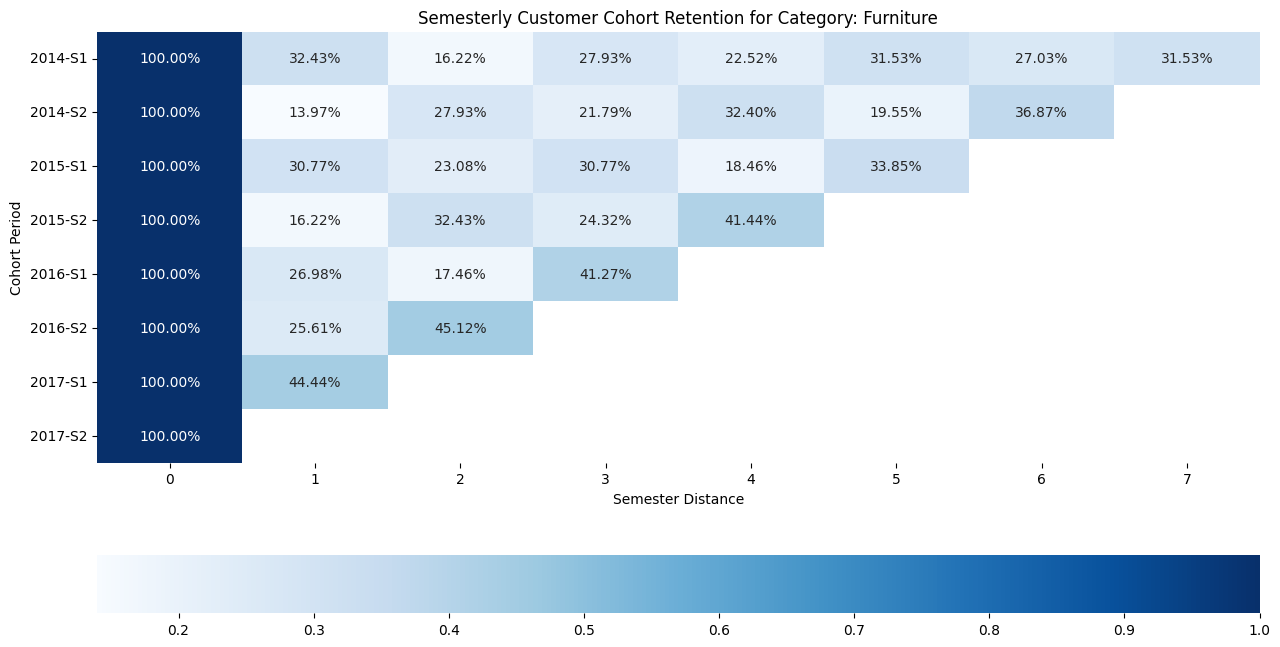

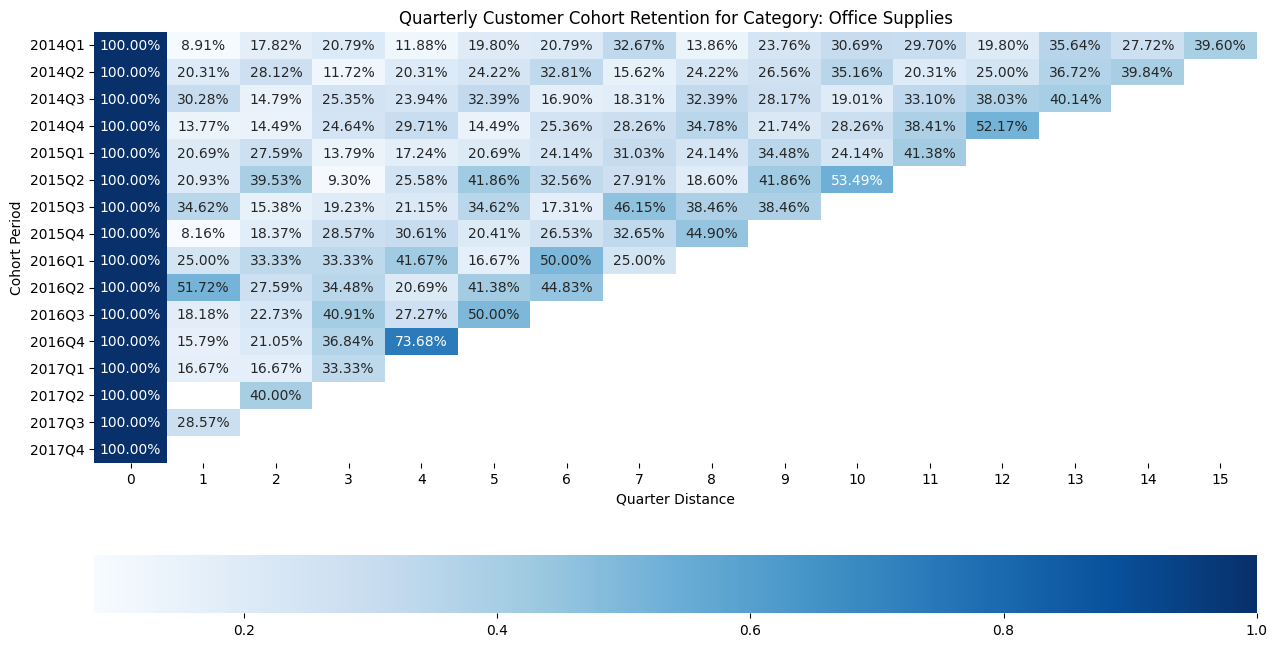

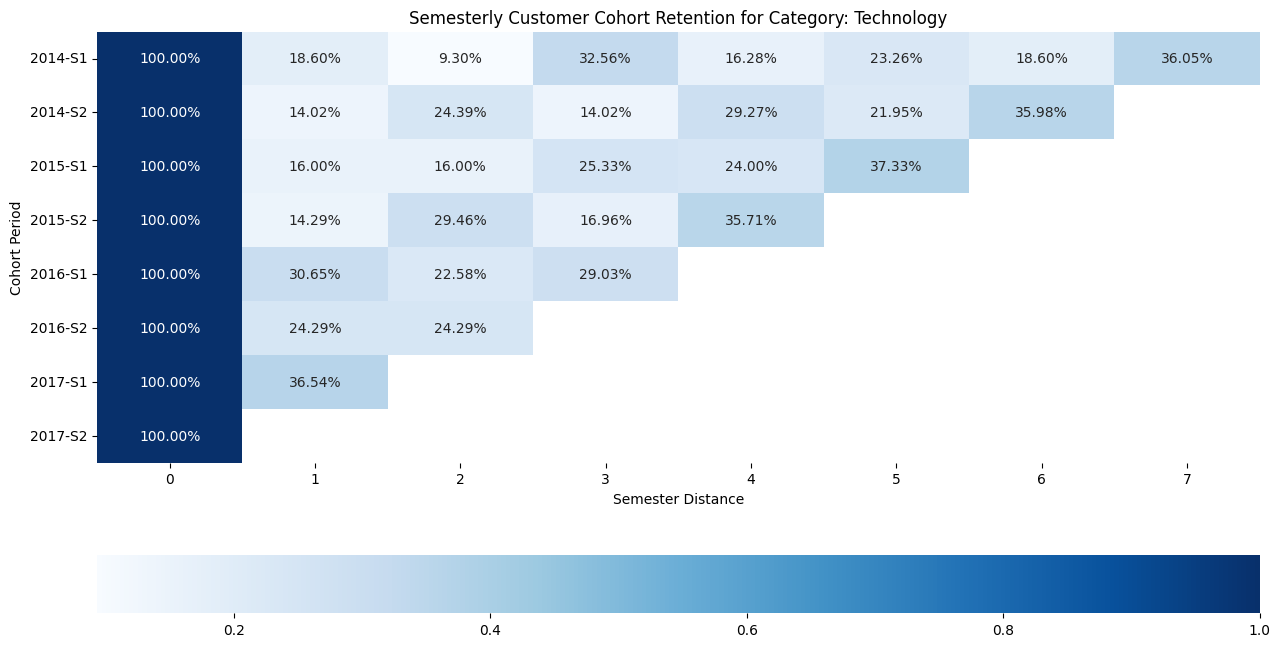

In [36]:
# Misalkan df adalah DataFrame Anda
dfgen = df.copy()

# Daftar kategori yang ingin Anda proses
categories = dfgen['Category'].unique()

# Loop untuk memproses setiap kategori
for category in categories:
    # Memfilter data untuk kategori saat ini
    df_category = dfgen[dfgen['Category'] == category].copy()
    
    # Step 1: Define cohort period
    if category == 'Office Supplies':
        df_category['cohort_period'] = df_category.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('Q')
        df_category['current_transaction_period'] = df_category['Order Date'].dt.to_period('Q')
    else:
        df_category['cohort_period'] = (
            df_category.groupby('Customer ID')['Order Date'].transform('min').dt.year.astype(str) + "-S" +
            (((df_category.groupby('Customer ID')['Order Date'].transform('min').dt.month - 1) // 6 + 1).astype(str))
        )
        df_category['current_transaction_period'] = (
            df_category['Order Date'].dt.year.astype(str) + "-S" +
            (((df_category['Order Date'].dt.month - 1) // 6 + 1).astype(str))
        )
    
    df_category = df_category[['Customer ID', 'cohort_period', 'current_transaction_period']]
    
    # Hanya butuh tau dia transaksi atau tidak (bukan jumlah transaksinya)
    df_category.drop_duplicates(inplace=True)
    
    # Step 3: Agregasi
    cohort_retention = df_category.groupby(['cohort_period', 'current_transaction_period'])['Customer ID'].count().reset_index().rename(columns={'Customer ID': 'count_user'})
    
    # Step 4: Menghitung period_distance berdasarkan perbedaan periode
    if category == 'Office Supplies':
        cohort_retention['period_distance'] = (
            (cohort_retention['current_transaction_period'].dt.year - cohort_retention['cohort_period'].dt.year) * 4 +
            (cohort_retention['current_transaction_period'].dt.quarter - cohort_retention['cohort_period'].dt.quarter)
        )
    else:
        cohort_retention['period_distance'] = (
            (cohort_retention['current_transaction_period'].str[:4].astype(int) - cohort_retention['cohort_period'].str[:4].astype(int)) * 2 +
            (cohort_retention['current_transaction_period'].str[-1].astype(int) - cohort_retention['cohort_period'].str[-1].astype(int))
        )
    
    # Step 5: Pivot table
    cohort_retention_pivot = cohort_retention.pivot_table(index='cohort_period', columns='period_distance', values='count_user')
    
    # Step 6: Menghitung retensi
    cohort_retention_final = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:, 0], axis=0)
    
    # Membuat heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(data=cohort_retention_final, annot=True, fmt='.2%', cbar_kws={'orientation': 'horizontal'}, cmap="Blues")
    plt.title(f"{'Quarterly' if category == 'Office Supplies' else 'Semesterly'} Customer Cohort Retention for Category: {category}")
    plt.xlabel(f"{'Quarter' if category == 'Office Supplies' else 'Semester'} Distance")
    plt.ylabel('Cohort Period')
    plt.show()


## insight Category Furniture
- Dari data yang ada, terlihat bahwa di setiap semester 2 terdapat kenaikan dibandingkan dengan semester 1 pada setiap periode cohort. Pola ini menunjukkan bahwa retensi pelanggan cenderung meningkat pada semester kedua setiap periode cohort
- Strategi yang diterapkan pada semester 2 tahun 2017 terbukti sangat efektif, karena dibandingkan dengan semester 2  2016, terdapat peningkatan retensi pelanggan yang signifikan. Hal ini menunjukkan bahwa upaya yang dilakukan pada periode tersebut efektif dalam mempertahankan pelanggan.
- Strategi yang diterapkan untuk semester 1 tahun 2017 kurang tepat, karena dibandingkan dengan semester 1 tahun 2016, hasilnya terlalu acak. Ada periode yang menunjukkan peningkatan signifikan, sementara yang lain justru mengalami penurunan drastis. Hal ini menunjukkan bahwa strategi yang digunakan tidak konsisten dalam mempertahankan pelanggan
- Secara keseluruhan, strategi yang diterapkan sudah sangat baik. Setiap semester 1 selalu menunjukkan peningkatan dibandingkan semester 1 tahun sebelumnya, dan begitu juga dengan semester 2 yang mayoritas menunjukkan retensi yang lebih baik dibandingkan semester 2 tahun sebelumnya. Namun, strategi yang diterapkan untuk semester 1 tahun 2017 kurang tepat, karena dibandingkan dengan semester 1 tahun 2016, hasilnya terlalu acak dengan beberapa periode menunjukkan peningkatan signifikan sementara yang lain mengalami penurunan drastis.

## insight Category Office Supplies
- Secara keseluruhan, kuartal 3 dan 4 cenderung memiliki retensi pelanggan yang lebih baik dibandingkan kuartal 1 dan 2. Hal ini terlihat dari data yang menunjukkan bahwa pelanggan lebih cenderung kembali melakukan pembelian pada kuartal 3 dan 4. Pola ini menunjukkan bahwa retensi pelanggan cenderung meningkat pada kuartal 3 dan 4 setiap periode cohort
- Strategi yang diterapkan pada kuartal 1 tahun 2016 kurang efektif. Hal ini terlihat dari data yang menunjukkan bahwa retensi pelanggan pada periode tersebut tidak sebaik kuartal-kuartal lainnya. Misalnya, tingkat retensi pada kuartal 1 tahun 2016 lebih rendah dibandingkan dengan kuartal 1 tahun 2015 dan kuartal 1 tahun 2017. Selain itu, ada fluktuasi yang signifikan dalam retensi pelanggan, dengan beberapa periode menunjukkan penurunan yang tajam. Hal ini menunjukkan bahwa strategi yang digunakan pada kuartal 1 tahun 2016 tidak konsisten dalam mempertahankan pelanggan.
- Secara umum, kuartal 1 memiliki retensi pelanggan yang paling rendah. Data menunjukkan bahwa pada kuartal 1, tingkat retensi cenderung lebih rendah dibandingkan dengan kuartal-kuartal lainnya.
- Secara keseluruhan, strategi customer retention yang diterapkan sudah sangat baik. Setiap kuartal menunjukkan peningkatan retensi dibandingkan kuartal yang sama pada tahun sebelumnya. Misalnya, retensi di kuartal 1 tahun 2014 cenderung naik di kuartal 1 tahun 2015, dan pola ini berlanjut untuk tahun 2016 dan 2017. Hal ini menunjukkan bahwa strategi yang diterapkan berhasil dalam mempertahankan pelanggan dari tahun ke tahun.

## insight Category Technologies
- Dari data yang ada, terlihat bahwa di setiap semester 2 setiap kategori terdapat kenaikan dibandingkan dengan semester 1 pada setiap periode cohort. Pola ini menunjukkan bahwa retensi pelanggan cenderung meningkat pada semester kedua setiap periode cohort
- Strategi yang diterapkan pada semester 1 tahun 2015 kurang efektif. Hal ini terlihat dari data yang menunjukkan bahwa retensi pelanggan pada periode tersebut tidak sebaik semester-semester dan bahkan bisa dibilang paling buruk.
- Strategi yang diterapkan secara keseluruhan untuk setiap semester sudah sangat baik. Setiap semester 1 selalu menunjukkan peningkatan dibandingkan semester 1 tahun sebelumnya. Begitu juga dengan semester 2, yang mayoritas menunjukkan retensi yang lebih baik dibandingkan semester 2 tahun sebelumnya. Hal ini menunjukkan bahwa upaya yang dilakukan pada setiap periode berhasil dalam mempertahankan pelanggan.

## Insight Secara General
- retensi pelanggan cenderung meningkat dalam 6 bulan terakhir setiap tahun. Hal ini menunjukkan bahwa pelanggan kita sangat musiman, dengan retensi yang paling baik terjadi pada akhir tahun.
- Jika ada kesalahan strategi, perusahaan secara cepat mengatasinya. Misalnya, ketika retensi pelanggan pada kuartal 1 tahun 2016 pada kategori Office Supplies tidak sebaik yang diharapkan, perusahaan segera melakukan evaluasi dan perbaikan sehingga retensi pelanggan pada semester berikutnya meningkat. Hal ini menunjukkan bahwa perusahaan memiliki respons yang cepat dan tepat dalam mengatasi masalah dan terus berupaya untuk meningkatkan retensi pelanggan.
- Strategi untuk setiap kategori sudah sangat baik, di mana hampir setiap periode menunjukkan peningkatan dibandingkan dengan periode sebelumnya. Misalnya, retensi pelanggan pada semester 1 tahun 2016 meningkat saat semester 1 tahun 2017, dan pola ini berlanjut untuk tahun-tahun berikutnya. Begitu juga dengan semester 2, di mana retensi pelanggan pada semester 2 tahun 2016 meningkat pada semester 2 tahun 2017. Hal ini menunjukkan bahwa upaya yang dilakukan berhasil dalam mempertahankan dan meningkatkan retensi pelanggan dari waktu ke waktu.

Rekomendasi Secara General

- Pada kategori Furniture dan Technology, terdapat pola yang konsisten di mana tingkat retensi pelanggan pada semester 1 setiap tahun tidak sebaik pada semester 2. Berdasarkan data yang telah dikumpulkan, kami merekomendasikan bisnis untuk memfokuskan strategi penjualan pada semester 1 dengan meningkatkan promosi, diskon, dan program loyalitas, atau menerapkan strategi kampanye yang sukses dari semester 2 ke semester 1 untuk menarik lebih banyak pelanggan lebih awal dalam tahun.

- Investigasi alasan di balik tingginya retensi pada periode tertentu, seperti **2017Q4**, dan terapkan strategi sukses tersebut pada periode dengan tingkat retensi rendah, seperti **kuartal 1** dan **kuartal 2**.

- Manfaatkan periode dengan tingkat retensi yang tinggi dengan merencanakan strategi marketing dan promosi yang ditargetkan untuk pelanggan pada periode tersebut untuk memaksimalkan retensi customer.

- Membuat mekanisme Feedback untuk memahami kenapa customer tidak kembali setelah periode tertentu dan menangani masalah yang mereka alami.

### Note
For a store that sells office supplies, technology, and furniture, it is more likely that people will buy more in the last semester of the year or in quarters 3 and 4. This is because:

1. **End-of-Year Budgeting**: Businesses often have budgets that they need to use up before the end of the fiscal year, leading to increased purchases of office supplies and technology.
2. **Holiday Season**: The holiday season drives consumer spending on technology and furniture for gifts and home improvements.
3. **Back-to-School Season**: Quarter 3 includes the back-to-school season, which boosts sales of office supplies and technology.
4. **New Product Releases**: Many tech companies release new products in the fall, attracting consumers to upgrade their devices.

These factors create a surge in demand for office supplies, technology, and furniture during the last semester of the year.

# Insight Terakhir

**Strategi:**
1. **Promosi Lintas Kategori**: Tawarkan diskon atau bundling produk yang mencakup lebih dari satu kategori untuk mendorong pengguna mencoba kategori lain.
2. **Program Loyalitas**: Buat program loyalitas yang memberikan poin atau hadiah tambahan bagi pengguna yang membeli dari berbagai kategori.
3. **Personalisasi Penawaran**: Gunakan data pembelian untuk memberikan rekomendasi produk yang relevan dari kategori lain yang mungkin menarik bagi pengguna.
4. **Komunikasi yang Tepat**: Kirimkan email atau notifikasi yang menyoroti produk dari kategori lain yang mungkin belum dicoba oleh pengguna, berdasarkan riwayat pembelian mereka.
5. **Ulasan dan Testimoni**: Tampilkan ulasan dan testimoni dari pengguna yang telah membeli dari berbagai kategori untuk membangun kepercayaan dan mendorong pembelian lintas kategori.

Dengan menerapkan strategi-strategi ini, perusahaan dapat meningkatkan retensi pelanggan dan mendorong pembelian lintas kategori, yang pada akhirnya akan meningkatkan loyalitas dan nilai seumur hidup pelanggan.